In [147]:
from google.colab import files
uploaded = files.upload()

Saving ObesityData.csv to ObesityData (3).csv


In [148]:
import pandas as pd

df = pd.read_csv('ObesityData.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [188]:
df['NCP'].describe()

,NCP
count,2111.000000
mean,2.685628
std,0.778039
min,1.000000
25%,2.658738
50%,3.000000
75%,3.000000
max,4.000000


In [149]:
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [151]:
df.shape

(2111, 17)

In [152]:
#Preprocessing
# No missing value present
# 1. Encoding - label and ordinal
# 2. Feature scaling
#feature enginnering

In [153]:
#No Ordinal encoding needed - FCVC, NCP,CH2O,FAF ,TUE,

In [154]:
#FCVC
df['FCVC'].value_counts()

,count
FCVC,
3.000000,652
2.000000,600
1.000000,33
2.971574,2
2.630137,2
...,...
2.886260,1
2.658112,1
2.027574,1


In [155]:
#Columns which need label encoding - Gender,family_history_with_overweight,FAVC,SMOKE,SCC,MTRANS

In [156]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

In [157]:
le_Gender = LabelEncoder()
le_family_history_with_overweight = LabelEncoder()
le_FAVC = LabelEncoder()
le_SMOKE = LabelEncoder()
le_SCC = LabelEncoder()
le_MTRANS = LabelEncoder()

In [158]:
df['Gender'] = le_Gender.fit_transform(df['Gender'])
df['family_history_with_overweight'] = le_family_history_with_overweight .fit_transform(df['family_history_with_overweight'])
df['FAVC'] = le_FAVC.fit_transform(df['FAVC'])
df['SMOKE'] = le_SMOKE.fit_transform(df['SMOKE'])
df['SCC'] = le_SCC.fit_transform(df['SCC'])
df['MTRANS'] = le_MTRANS.fit_transform(df['MTRANS'])

In [159]:
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,3,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,3,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,3,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,4,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,3,Overweight_Level_II
5,1,29.0,1.62,53.0,0,1,2.0,3.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,0,Normal_Weight
6,0,23.0,1.50,55.0,1,1,3.0,3.0,Sometimes,0,2.0,0,1.0,0.0,Sometimes,2,Normal_Weight
7,1,22.0,1.64,53.0,0,0,2.0,3.0,Sometimes,0,2.0,0,3.0,0.0,Sometimes,3,Normal_Weight
8,1,24.0,1.78,64.0,1,1,3.0,3.0,Sometimes,0,2.0,0,1.0,1.0,Frequently,3,Normal_Weight
9,1,22.0,1.72,68.0,1,1,2.0,3.0,Sometimes,0,2.0,0,1.0,1.0,no,3,Normal_Weight


In [160]:
df['Gender'].value_counts()

,count
Gender,
1,1068
0,1043


In [161]:
df['family_history_with_overweight'].value_counts()

,count
family_history_with_overweight,
1,1726
0,385


In [162]:
#Columns which need ordinal endcoding - CAEC,CALC
from sklearn.preprocessing import OrdinalEncoder

In [163]:
oe = OrdinalEncoder(categories=[['no', 'Sometimes', 'Frequently','Always']])

In [164]:
df['CAEC'] = oe.fit_transform(df[['CAEC']])
df['CALC'] = oe.fit_transform(df[['CALC']])

In [165]:
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1.0,0,2.0,0,0.0,1.0,0.0,3,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1.0,1,3.0,1,3.0,0.0,1.0,3,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1.0,0,2.0,0,2.0,1.0,2.0,3,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1.0,0,2.0,0,2.0,0.0,2.0,4,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1.0,0,2.0,0,0.0,0.0,1.0,3,Overweight_Level_II
5,1,29.0,1.62,53.0,0,1,2.0,3.0,1.0,0,2.0,0,0.0,0.0,1.0,0,Normal_Weight
6,0,23.0,1.50,55.0,1,1,3.0,3.0,1.0,0,2.0,0,1.0,0.0,1.0,2,Normal_Weight
7,1,22.0,1.64,53.0,0,0,2.0,3.0,1.0,0,2.0,0,3.0,0.0,1.0,3,Normal_Weight
8,1,24.0,1.78,64.0,1,1,3.0,3.0,1.0,0,2.0,0,1.0,1.0,2.0,3,Normal_Weight
9,1,22.0,1.72,68.0,1,1,2.0,3.0,1.0,0,2.0,0,1.0,1.0,0.0,3,Normal_Weight


In [166]:
df['Age'].value_counts()

,count
Age,
18.000000,128
26.000000,101
21.000000,96
23.000000,89
19.000000,59
...,...
50.832559,1
19.671876,1
18.951144,1


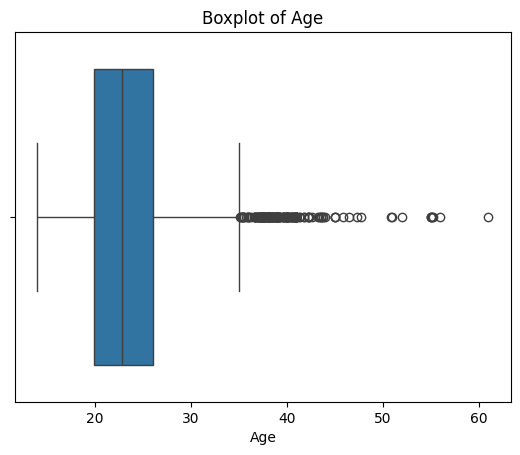

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age")
plt.show()

In [168]:
df['Age'].describe()

,Age
count,2111.000000
mean,24.312600
std,6.345968
min,14.000000
25%,19.947192
50%,22.777890
75%,26.000000
max,61.000000


In [169]:
from sklearn.model_selection import train_test_split

In [170]:
y = df['NObeyesdad']
y

,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II
...,...
2106,Obesity_Type_III
2107,Obesity_Type_III
2108,Obesity_Type_III
2109,Obesity_Type_III


In [171]:
X = df.drop('NObeyesdad', axis=1)
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1.0,0,2.0,0,0.0,1.0,0.0,3
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1.0,1,3.0,1,3.0,0.0,1.0,3
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1.0,0,2.0,0,2.0,1.0,2.0,3
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1.0,0,2.0,0,2.0,0.0,2.0,4
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1.0,0,2.0,0,0.0,0.0,1.0,3


In [175]:
from sklearn.preprocessing import StandardScaler

In [176]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assume X is your full encoded dataframe
scale_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Separate columns to scale and columns to leave untouched
X_to_scale = X[scale_columns]
X_rest = X.drop(columns=scale_columns)

# Apply scaling only to numeric features
scaler = StandardScaler()
X_scaled_part = pd.DataFrame(scaler.fit_transform(X_to_scale), columns=scale_columns, index=X.index)

# Combine scaled numeric and unscaled categorical/encoded features
X_scaled = pd.concat([X_scaled_part, X_rest], axis=1)

# 🔁 Reorder columns to match original X
X_scaled = X_scaled[X.columns]

# Done — X_scaled now has proper values & column order

# Now X_final_scaled is your final input
print(X_scaled.head())


   Gender       Age    Height    Weight  family_history_with_overweight  FAVC  \
0       0 -0.522124 -0.875589 -0.862558                               1     0   
1       0 -0.522124 -1.947599 -1.168077                               1     0   
2       1 -0.206889  1.054029 -0.366090                               1     0   
3       1  0.423582  1.054029  0.015808                               0     0   
4       1 -0.364507  0.839627  0.122740                               0     0   

       FCVC       NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  CALC  \
0 -0.785019  0.404153   1.0      0 -0.013073    0 -1.188039  0.561997   0.0   
1  1.088342  0.404153   1.0      1  1.618759    1  2.339750 -1.080625   1.0   
2 -0.785019  0.404153   1.0      0 -0.013073    0  1.163820  0.561997   2.0   
3  1.088342  0.404153   1.0      0 -0.013073    0  1.163820 -1.080625   2.0   
4 -0.785019 -2.167023   1.0      0 -0.013073    0 -1.188039 -1.080625   1.0   

   MTRANS  
0       3  
1       3  
2 

In [178]:
from sklearn.model_selection import train_test_split

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42,stratify=y)

In [180]:
from sklearn.linear_model import LogisticRegression

In [181]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [182]:
y_pred = model.predict(X_test)

In [183]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [185]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8723404255319149

Confusion Matrix:
 [[53  1  0  0  0  0  0]
 [ 6 40  0  0  0 11  1]
 [ 0  0 66  2  0  0  2]
 [ 0  0  1 59  0  0  0]
 [ 0  0  0  1 64  0  0]
 [ 0  5  1  0  0 45  7]
 [ 0  2  7  0  0  7 42]]

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.90      0.98      0.94        54
      Normal_Weight       0.83      0.69      0.75        58
     Obesity_Type_I       0.88      0.94      0.91        70
    Obesity_Type_II       0.95      0.98      0.97        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.71      0.78      0.74        58
Overweight_Level_II       0.81      0.72      0.76        58

           accuracy                           0.87       423
          macro avg       0.87      0.87      0.87       423
       weighted avg       0.87      0.87      0.87       423



In [186]:

from sklearn.metrics import confusion_matrix

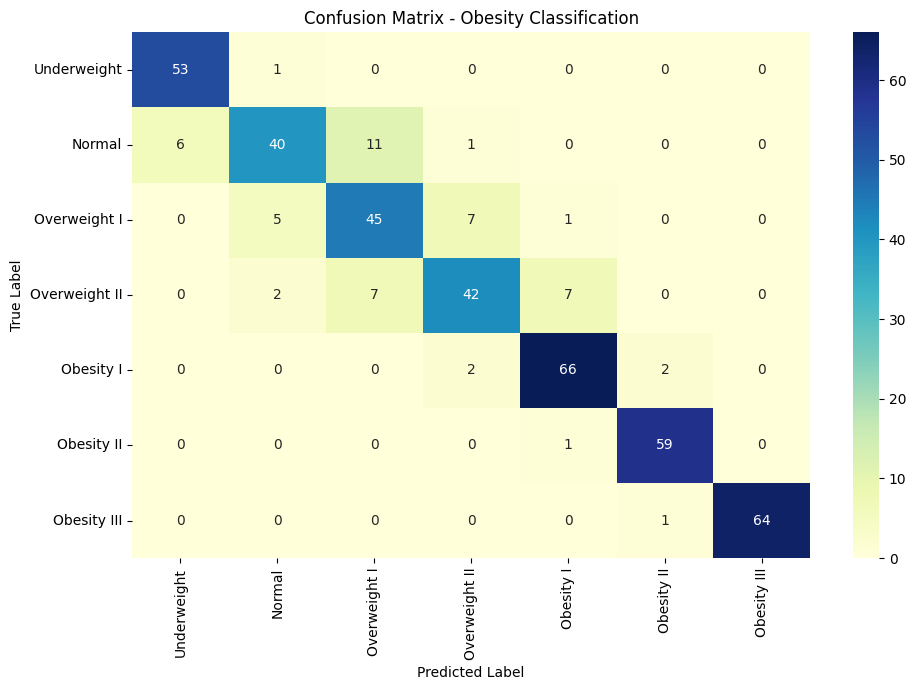

In [187]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Full class label list in correct order
labels = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

# Simplified class names for display in plot
display_labels = [
    'Underweight', 'Normal', 'Overweight I',
    'Overweight II', 'Obesity I', 'Obesity II', 'Obesity III'
]

# Compute confusion matrix (specifying class order)
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=display_labels, yticklabels=display_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Obesity Classification')
plt.tight_layout()
plt.show()
